In [1]:
import numpy as np
import NUTS as hmc
import hmc as hmc2
import matplotlib.pyplot as plt
import corner
import time
import sklearn.datasets as skld

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-40,40),(-40,40),(-40,40)]
nparam = len(limits)

cov = skld.make_spd_matrix(nparam)
#cov = np.eye(nparam)
inv_cov = np.linalg.inv(cov)
print(cov)


[[ 1.83381782  1.21384146 -0.84578799]
 [ 1.21384146  1.31181774 -0.92458022]
 [-0.84578799 -0.92458022  1.33091515]]


In [3]:
def mock_posterior_and_gradient(p):
    grad = -p @ inv_cov
    #j = theory_jacobian(p, *self.args).T
    logP = 0.5 * grad @ p.T
    #logP_jacobian = j @ dlogL_dCl
    #logP_jacobian = p * (-1)
    #mock_posterior_and_gradient.counter += 1
    return logP, grad

In [4]:
def run_hmc(n_it, hmc, cov, burnin):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.NUTS(fid_params, 0.5, n_it, burnin)

    return sampler

In [5]:
def run_hmc2(n_it, epsilon, hmc, spit, cov):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, epsilon, spit, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    return sampler

In [6]:
nit = 100000
burnin = 5000

start = time.time()
chain = run_hmc(nit, hmc, cov, burnin)
print("Total time to run is %.2f s" %(time.time()-start))
print("")

start = time.time()
#chain2 = run_hmc(nit, hmc, cov, burnin)
chain2 = run_hmc2(nit, 0.02, hmc2, 10, cov)
print("Total time to run is %.2f s" %(time.time()-start))

2.0
Reasonable epsilon is 2.0
final epsilon is 1.4682979115646568
Step 5250 of 105000
Step 10500 of 105000
Step 15750 of 105000
Step 21000 of 105000
Step 26250 of 105000
Step 31500 of 105000
Step 36750 of 105000
Step 42000 of 105000
Step 47250 of 105000
Step 52500 of 105000
Step 57750 of 105000
Step 63000 of 105000
Step 68250 of 105000
Step 73500 of 105000
Step 78750 of 105000
Step 84000 of 105000
Step 89250 of 105000
Step 94500 of 105000
Step 99750 of 105000
Total time to run is 27.37 s

Accept 0 alpha=1.00  p=0.58  ΔH=0.000
Accept 5000 alpha=1.00  p=0.33  ΔH=0.000
Accept 10000 alpha=1.00  p=0.36  ΔH=-0.000
Accept 15000 alpha=1.00  p=0.69  ΔH=-0.000
Accept 20000 alpha=1.00  p=0.26  ΔH=0.000
Accept 25000 alpha=1.00  p=0.85  ΔH=0.000
Accept 30000 alpha=1.00  p=0.17  ΔH=-0.000
Accept 35000 alpha=1.00  p=0.61  ΔH=-0.000
Accept 40000 alpha=1.00  p=0.24  ΔH=-0.000
Accept 45000 alpha=1.00  p=0.48  ΔH=0.000
Accept 50000 alpha=1.00  p=0.06  ΔH=-0.000
Accept 55000 alpha=1.00  p=0.30  ΔH=-0.000


In [7]:
#paths = np.array(chain.paths)
#anti_paths = np.array(chain.anti_paths)

trace = np.array(chain.trace)
calls = np.array(chain.ncall_list)

#print(trace)

print(trace.shape)
print(calls.shape)

trace2 = np.array(chain2.trace)
calls2 = np.array(chain2.ncall_list)
print(trace2.shape)
print(calls2.shape)

(35757, 3)
(35757,)
(100000, 3)
(100000,)


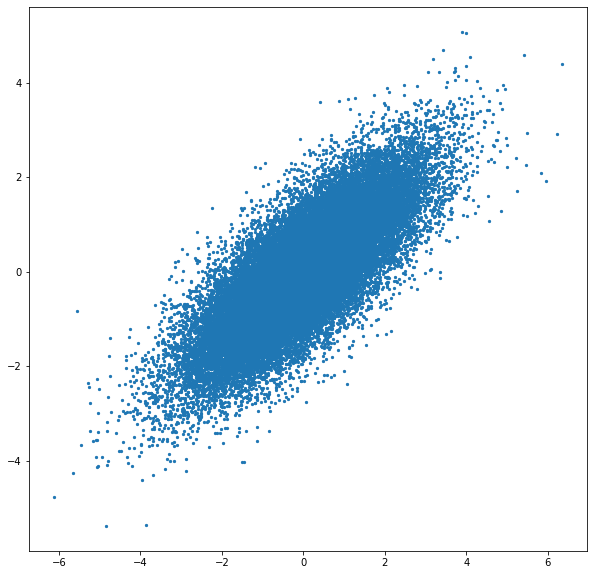

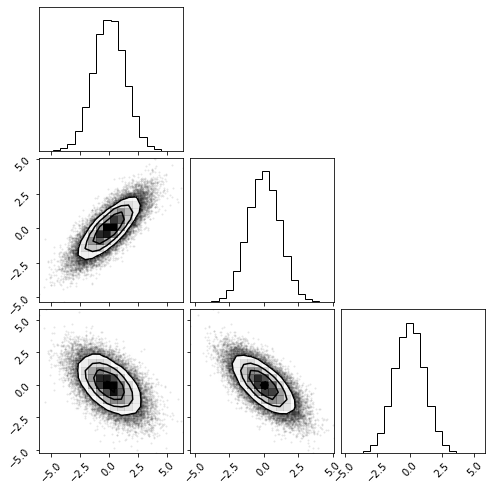

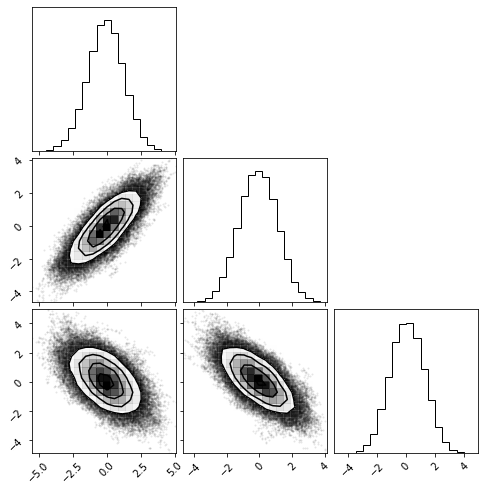

In [8]:
#plt.scatter(paths[:,0],paths[:,1],s=3)
#plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
#plt.show()

plt.scatter(trace[:,0],trace[:,1],s=5)
#plt.scatter(trace2[:,0],trace2[:,1],s=5)
plt.show()

figure = corner.corner(trace)
figure2 = corner.corner(trace2)

In [9]:
def plot_conv(trace,dim,botlim,toplim, hmc, cov, calls):
    STDs, means = [], []
    for i in range(trace.shape[0]):
        STD=np.std(trace[:i,dim])
        STDs.append(STD/np.sqrt(cov[dim,dim]))
        means.append(np.mean(trace[:i,dim]))
    plt.plot(calls, STDs, label="STD/sigma hmc %s" %hmc)
    plt.plot(calls, means, label="mean hmc %s" %hmc)
    plt.hlines([0,1],0,calls[-1],ls=":", color="k")
    plt.legend()
    plt.title("Mean & STD vs L-calls for dim %.0f" %dim)
    #plt.ylim(botlim,toplim)
    
    #print(np.std(trace[:,dim]))
    

<ipython-input-11-836eba31ac76>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[1.3541853  1.10174473        nan]
 [1.10174473 1.14534612        nan]
 [       nan        nan 1.15365296]]


/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


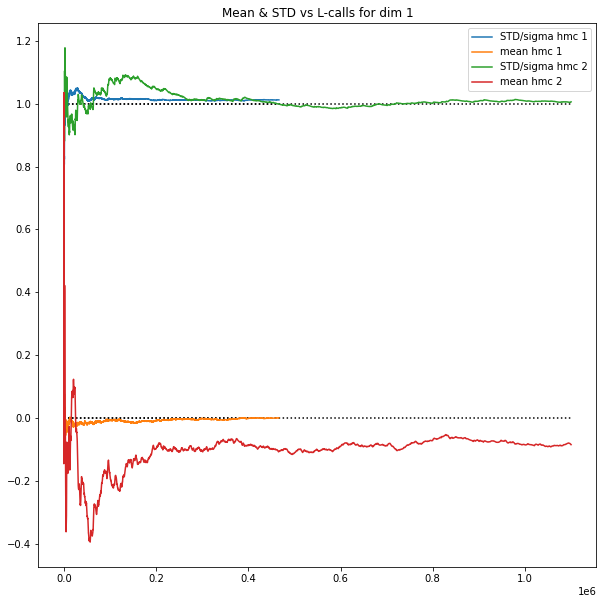

In [11]:
print(np.sqrt(cov))

plot_conv(trace,1,-1,1.5,1, cov, calls)
plot_conv(trace2,1,-1,1.5,2, cov, calls2)
plt.show()